In [108]:
import pandas as pd

# Read parquet file
math_val = pd.read_parquet("../eval_results/Responses_L1-Max-Qwen-1.5B-Adaptive_test_no_level_type.parquet")
math_val

,data_source,prompt,ability,reward_model,extra_info,responses,token_lengths
0,MATH,[{'content': 'Let \[f(n) = \left\{ \begin{arra...,math,"{'ground_truth': '12', 'num_tokens': 2000, 'st...","{'index': 0, 'level': 4.0, 'split': 'test', 't...","[\]\nOkay, so I have this function f(n) define...",[704]
1,MATH,[{'content': 'What is the value of $(26^2 - 24...,math,"{'ground_truth': '8000', 'num_tokens': 2000, '...","{'index': 1, 'level': 2.0, 'split': 'test', 't...",[) To find the value of \((26^2 - 24^2 - 10)^2...,[372]
2,MATH,[{'content': 'A worker receives an annual wage...,math,"{'ground_truth': '10', 'num_tokens': 2000, 'st...","{'index': 2, 'level': 5.0, 'split': 'test', 't...","[, \nOkay, so I have this problem where a work...",[769]
3,MATH,[{'content': 'What is the 2003rd term of the s...,math,"{'ground_truth': '4005', 'num_tokens': 2000, '...","{'index': 3, 'level': 2.0, 'split': 'test', 't...",[0\n\nTo find the 2003rd term of the sequence ...,[268]
4,MATH,[{'content': 'Simplify the following:$$\frac{3...,math,"{'ground_truth': '\frac{\sqrt{3}}{3}', 'num_to...","{'index': 4, 'level': 3.0, 'split': 'test', 't...",[ the expression is 3 divided by the square ro...,[417]
...,...,...,...,...,...,...,...
495,MATH,[{'content': 'Find the remainder when $(5x + 9...,math,"{'ground_truth': '12', 'num_tokens': 2000, 'st...","{'index': 495, 'level': 3.0, 'split': 'test', ...",[) To find the remainder when the given polyno...,[694]
496,MATH,[{'content': 'Find the number of ordered pairs...,math,"{'ground_truth': '81', 'num_tokens': 2000, 'st...","{'index': 496, 'level': 5.0, 'split': 'test', ...","[...\nOkay, so I need to find the number of or...",[987]
497,MATH,[{'content': 'Let $T$ be the set of all triple...,math,"{'ground_truth': '\frac{17}{21}', 'num_tokens'...","{'index': 497, 'level': 5.0, 'split': 'test', ...","[...\nOkay, so I have this problem here: I nee...",[2001]
498,MATH,[{'content': 'The graphs of $x^2 + y^2 + 6x - ...,math,"{'ground_truth': '40', 'num_tokens': 2000, 'st...","{'index': 498, 'level': 4.0, 'split': 'test', ...","[\nOkay, so I have this problem with two equat...",[1855]


In [109]:
from utils import last_boxed_only_string, remove_boxed
import numpy as np

def extract_answer(solution_str: str) -> str:
    """Extract the final boxed answer from a solution string."""
    return remove_boxed(last_boxed_only_string(solution_str))

math_val["level"] = math_val["extra_info"].apply(lambda d: d.get("level") if isinstance(d, dict) else None)
math_val["type"] = math_val["extra_info"].apply(lambda d: d.get("type") if isinstance(d, dict) else None)
math_val["ground_truth"] = math_val["reward_model"].apply(lambda d: d["ground_truth"])
math_val["responses"] = math_val["responses"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
math_val["answer"] = math_val["responses"].apply(lambda r: extract_answer(r) if r else None)
math_val["token_lengths"] = math_val["token_lengths"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)

math_val

,data_source,prompt,ability,reward_model,extra_info,responses,token_lengths,level,type,ground_truth,answer
0,MATH,[{'content': 'Let \[f(n) = \left\{ \begin{arra...,math,"{'ground_truth': '12', 'num_tokens': 2000, 'st...","{'index': 0, 'level': 4.0, 'split': 'test', 't...","\]\nOkay, so I have this function f(n) defined...",704,4.0,Algebra,12,12
1,MATH,[{'content': 'What is the value of $(26^2 - 24...,math,"{'ground_truth': '8000', 'num_tokens': 2000, '...","{'index': 1, 'level': 2.0, 'split': 'test', 't...",) To find the value of \((26^2 - 24^2 - 10)^2 ...,372,2.0,Algebra,8000,8000
2,MATH,[{'content': 'A worker receives an annual wage...,math,"{'ground_truth': '10', 'num_tokens': 2000, 'st...","{'index': 2, 'level': 5.0, 'split': 'test', 't...",", \nOkay, so I have this problem where a worke...",769,5.0,Algebra,10,10
3,MATH,[{'content': 'What is the 2003rd term of the s...,math,"{'ground_truth': '4005', 'num_tokens': 2000, '...","{'index': 3, 'level': 2.0, 'split': 'test', 't...",0\n\nTo find the 2003rd term of the sequence o...,268,2.0,Algebra,4005,4005
4,MATH,[{'content': 'Simplify the following:$$\frac{3...,math,"{'ground_truth': '\frac{\sqrt{3}}{3}', 'num_to...","{'index': 4, 'level': 3.0, 'split': 'test', 't...",the expression is 3 divided by the square roo...,417,3.0,Algebra,\frac{\sqrt{3}}{3},\frac{\sqrt{3}}{3}
...,...,...,...,...,...,...,...,...,...,...,...
495,MATH,[{'content': 'Find the remainder when $(5x + 9...,math,"{'ground_truth': '12', 'num_tokens': 2000, 'st...","{'index': 495, 'level': 3.0, 'split': 'test', ...",) To find the remainder when the given polynom...,694,3.0,Intermediate Algebra,12,12
496,MATH,[{'content': 'Find the number of ordered pairs...,math,"{'ground_truth': '81', 'num_tokens': 2000, 'st...","{'index': 496, 'level': 5.0, 'split': 'test', ...","...\nOkay, so I need to find the number of ord...",987,5.0,Intermediate Algebra,81,81
497,MATH,[{'content': 'Let $T$ be the set of all triple...,math,"{'ground_truth': '\frac{17}{21}', 'num_tokens'...","{'index': 497, 'level': 5.0, 'split': 'test', ...","...\nOkay, so I have this problem here: I need...",2001,5.0,Intermediate Algebra,\frac{17}{21},None
498,MATH,[{'content': 'The graphs of $x^2 + y^2 + 6x - ...,math,"{'ground_truth': '40', 'num_tokens': 2000, 'st...","{'index': 498, 'level': 4.0, 'split': 'test', ...","\nOkay, so I have this problem with two equati...",1855,4.0,Intermediate Algebra,40,40


In [110]:
import sys
import os

# Add the project root (one level up from explore/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import importlib
import scripts.math_reward

importlib.reload(scripts.math_reward)

from scripts.math_reward import math_reward_fn

target_tokens = 2000

math_val["reward"] = math_val.apply(
    lambda row: math_reward_fn(row["responses"], row["ground_truth"], target_tokens, row["token_lengths"]), 
    axis=1
)

math_val["is_correct"] = math_val["reward"] > 0

math_val

,data_source,prompt,ability,reward_model,extra_info,responses,token_lengths,level,type,ground_truth,answer,reward,is_correct
0,MATH,[{'content': 'Let \[f(n) = \left\{ \begin{arra...,math,"{'ground_truth': '12', 'num_tokens': 2000, 'st...","{'index': 0, 'level': 4.0, 'split': 'test', 't...","\]\nOkay, so I have this function f(n) defined...",704,4.0,Algebra,12,12,0.884675,True
1,MATH,[{'content': 'What is the value of $(26^2 - 24...,math,"{'ground_truth': '8000', 'num_tokens': 2000, '...","{'index': 1, 'level': 2.0, 'split': 'test', 't...",) To find the value of \((26^2 - 24^2 - 10)^2 ...,372,2.0,Algebra,8000,8000,0.933685,True
2,MATH,[{'content': 'A worker receives an annual wage...,math,"{'ground_truth': '10', 'num_tokens': 2000, 'st...","{'index': 2, 'level': 5.0, 'split': 'test', 't...",", \nOkay, so I have this problem where a worke...",769,5.0,Algebra,10,10,0.871479,True
3,MATH,[{'content': 'What is the 2003rd term of the s...,math,"{'ground_truth': '4005', 'num_tokens': 2000, '...","{'index': 3, 'level': 2.0, 'split': 'test', 't...",0\n\nTo find the 2003rd term of the sequence o...,268,2.0,Algebra,4005,4005,0.944238,True
4,MATH,[{'content': 'Simplify the following:$$\frac{3...,math,"{'ground_truth': '\frac{\sqrt{3}}{3}', 'num_to...","{'index': 4, 'level': 3.0, 'split': 'test', 't...",the expression is 3 divided by the square roo...,417,3.0,Algebra,\frac{\sqrt{3}}{3},\frac{\sqrt{3}}{3},0.928520,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,MATH,[{'content': 'Find the remainder when $(5x + 9...,math,"{'ground_truth': '12', 'num_tokens': 2000, 'st...","{'index': 495, 'level': 3.0, 'split': 'test', ...",) To find the remainder when the given polynom...,694,3.0,Intermediate Algebra,12,12,0.886581,True
496,MATH,[{'content': 'Find the number of ordered pairs...,math,"{'ground_truth': '81', 'num_tokens': 2000, 'st...","{'index': 496, 'level': 5.0, 'split': 'test', ...","...\nOkay, so I need to find the number of ord...",987,5.0,Intermediate Algebra,81,81,0.815173,True
497,MATH,[{'content': 'Let $T$ be the set of all triple...,math,"{'ground_truth': '\frac{17}{21}', 'num_tokens'...","{'index': 497, 'level': 5.0, 'split': 'test', ...","...\nOkay, so I have this problem here: I need...",2001,5.0,Intermediate Algebra,\frac{17}{21},None,-1.000000,False
498,MATH,[{'content': 'The graphs of $x^2 + y^2 + 6x - ...,math,"{'ground_truth': '40', 'num_tokens': 2000, 'st...","{'index': 498, 'level': 4.0, 'split': 'test', ...","\nOkay, so I have this problem with two equati...",1855,4.0,Intermediate Algebra,40,40,0.214682,True


In [89]:
math_val[math_val['is_correct'] == True]["token_lengths"].value_counts().sort_index(ascending=False)


token_lengths
3364    1
3258    1
3254    1
3079    1
3027    1
       ..
339     1
319     1
314     1
301     1
279     1
Name: count, Length: 1293, dtype: int64

In [93]:
cdf = math_val[math_val['is_correct']==True]["token_lengths"].value_counts(normalize=True).sort_index().cumsum()
cdf

# 96% of correct answers are within 2000 tokens
# 92% of all answers are within 2000 tokens

token_lengths
279     0.000260
301     0.000520
314     0.000781
319     0.001041
339     0.001301
          ...   
3027    0.998959
3079    0.999219
3254    0.999480
3258    0.999740
3364    1.000000
Name: proportion, Length: 1293, dtype: float64

## Average Token Length Per Type and Level

We also look into the average length considering correct and incorrect answers only

In [60]:
grouped_all = math_val.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

grouped_all

,type,level,mean,std
0,Algebra,1.0,1186.500000,318.910049
1,Algebra,2.0,1212.505556,287.981911
2,Algebra,3.0,1240.289362,259.391236
3,Algebra,4.0,1280.889328,305.737002
4,Algebra,5.0,1373.469314,347.006500
5,Counting & Probability,1.0,1223.837838,303.561591
6,Counting & Probability,2.0,1219.946809,264.014066
7,Counting & Probability,3.0,1324.177083,292.059078
8,Counting & Probability,4.0,1420.785714,321.694363
9,Counting & Probability,5.0,1601.684685,704.634205


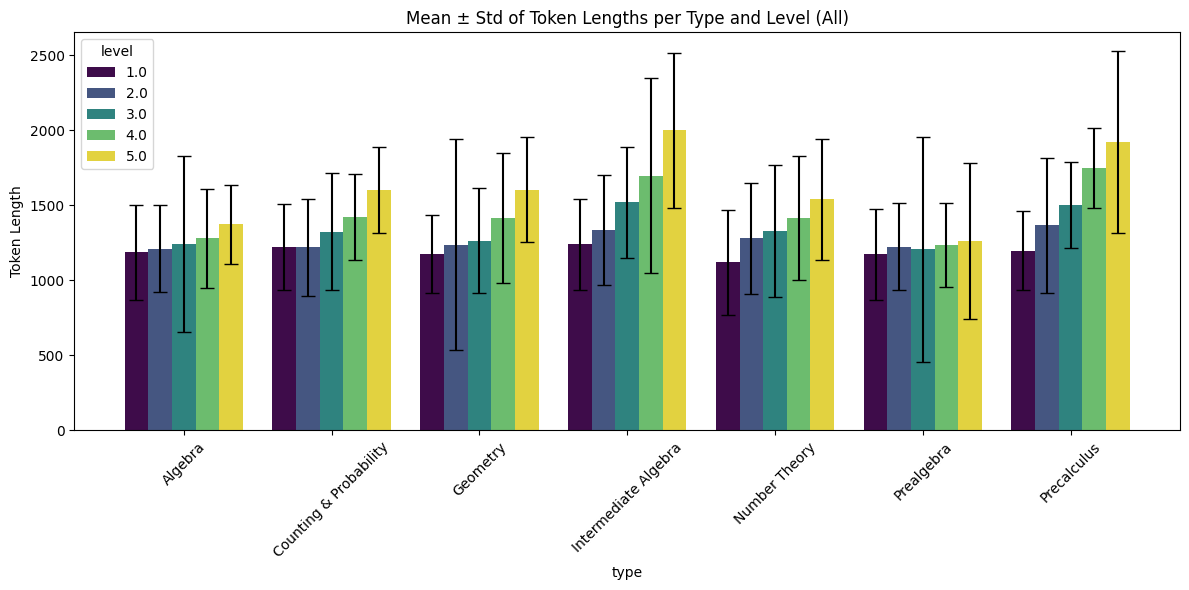

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by type and level, calculate mean and std
grouped_all = math_val.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_all, x='type', y='mean', hue='level', palette='viridis')

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Type and Level (All)')
plt.ylabel('Token Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

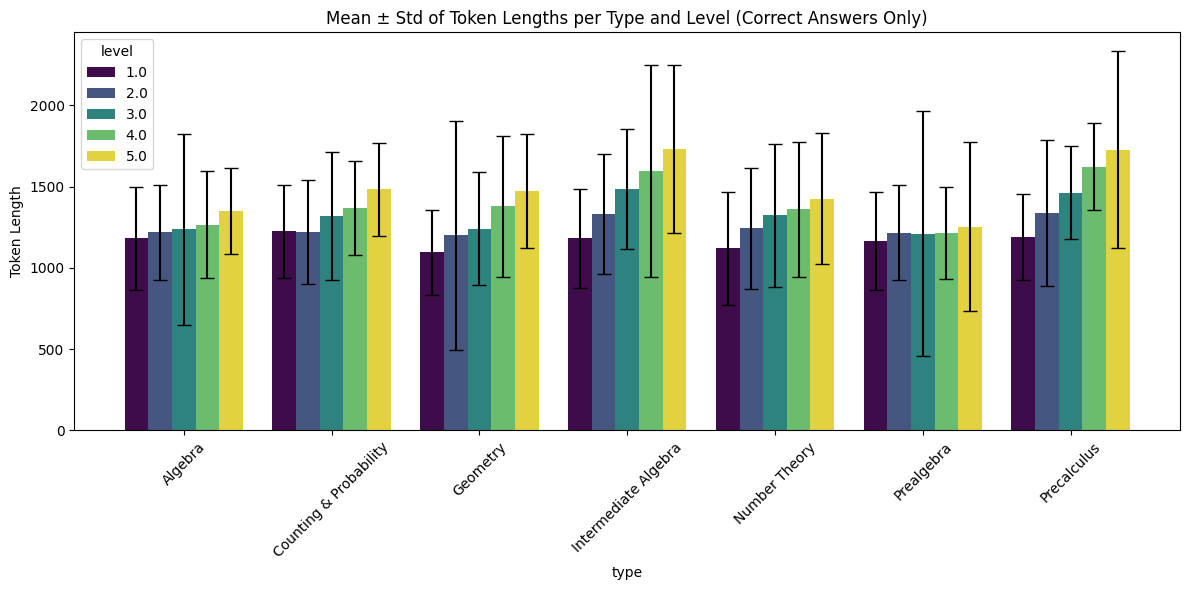

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CORRECT ANSWERS ONLY
correct = math_val[math_val['is_correct'] == True]
grouped_correct = correct.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_correct, x='type', y='mean', hue='level', palette='viridis')

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Type and Level (Correct Answers Only)')
plt.ylabel('Token Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

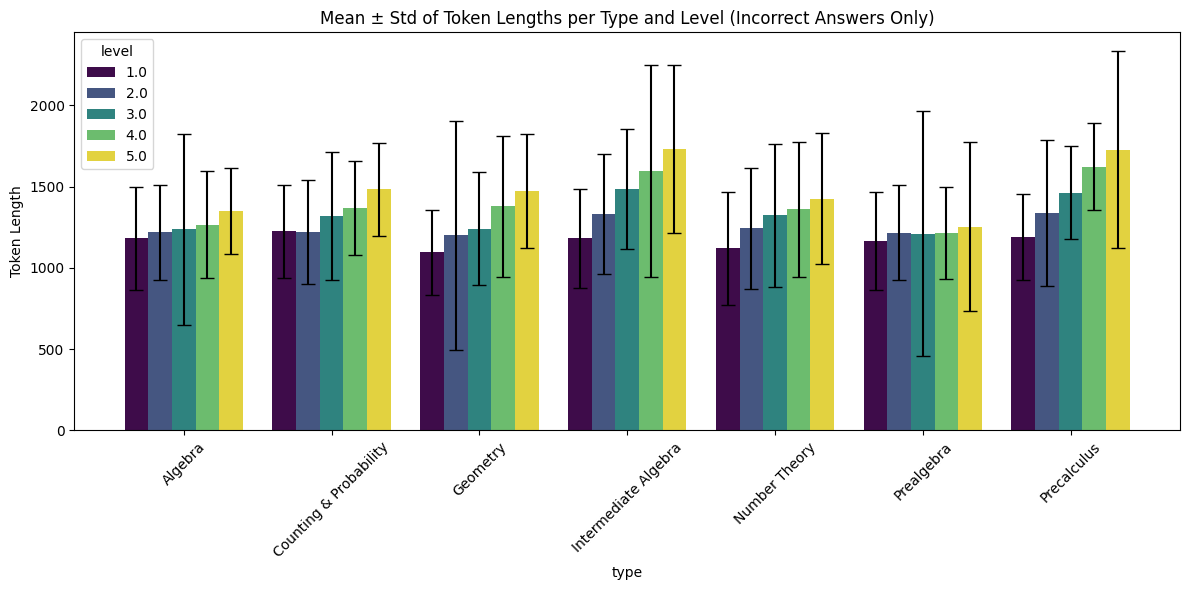

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CORRECT ANSWERS ONLY
incorrect = math_val[math_val['is_correct'] == False]
grouped_incorrect = incorrect.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_correct, x='type', y='mean', hue='level', palette='viridis')

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Type and Level (Incorrect Answers Only)')
plt.ylabel('Token Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
# TABLE SUMMARY
grouped_all['group'] = 'all'
grouped_correct['group'] = 'correct'
grouped_incorrect['group'] = 'incorrect'

token_length_summary = pd.concat([grouped_all, grouped_correct, grouped_incorrect], ignore_index=True)
token_length_summary = token_length_summary.sort_values(by=['type', 'level']).reset_index(drop=True)

token_length_summary

,type,level,mean,std,group
0,Algebra,1.0,1186.500000,318.910049,all
1,Algebra,1.0,1181.508772,321.426226,correct
2,Algebra,1.0,1328.750000,216.770808,incorrect
3,Algebra,2.0,1212.505556,287.981911,all
4,Algebra,2.0,1220.301136,281.374494,correct
...,...,...,...,...,...
99,Precalculus,4.0,1623.128571,400.748753,correct
100,Precalculus,4.0,2038.548387,638.360444,incorrect
101,Precalculus,5.0,1921.528455,605.536618,all
102,Precalculus,5.0,1726.913043,418.627229,correct


## Average Token Length Per Level ONLY

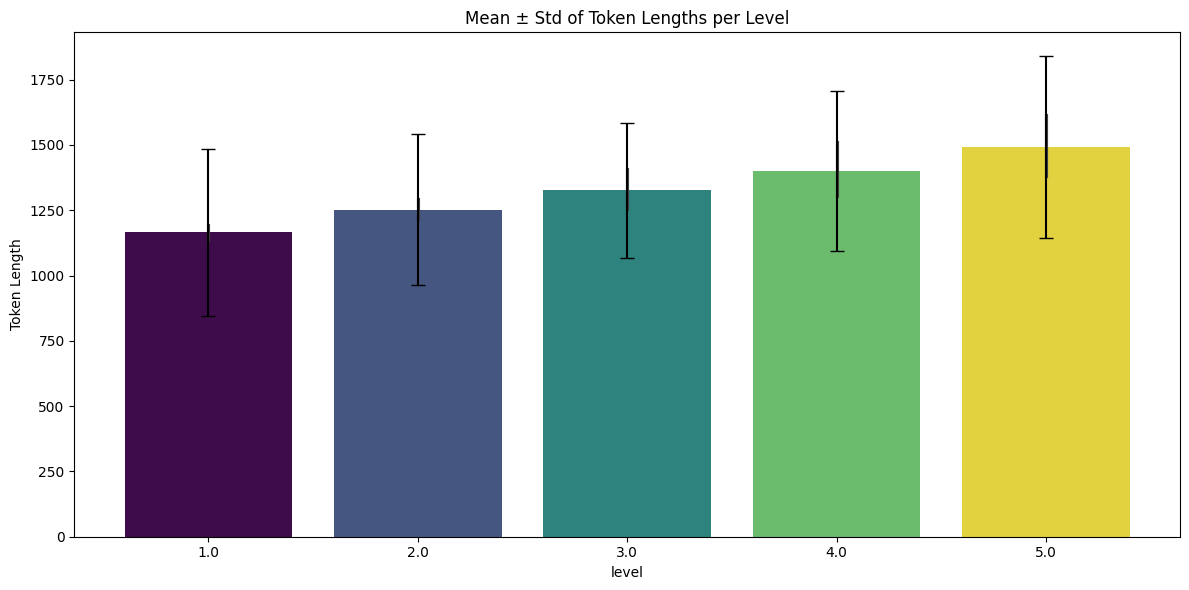

In [77]:
grouped_lvl_all = math_val.groupby('level')['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_correct, x='level', y='mean', hue='level', palette='viridis', legend=False)

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Level')
plt.ylabel('Token Length')
plt.tight_layout()
plt.show()

## Average Token Length Per Type ONLY

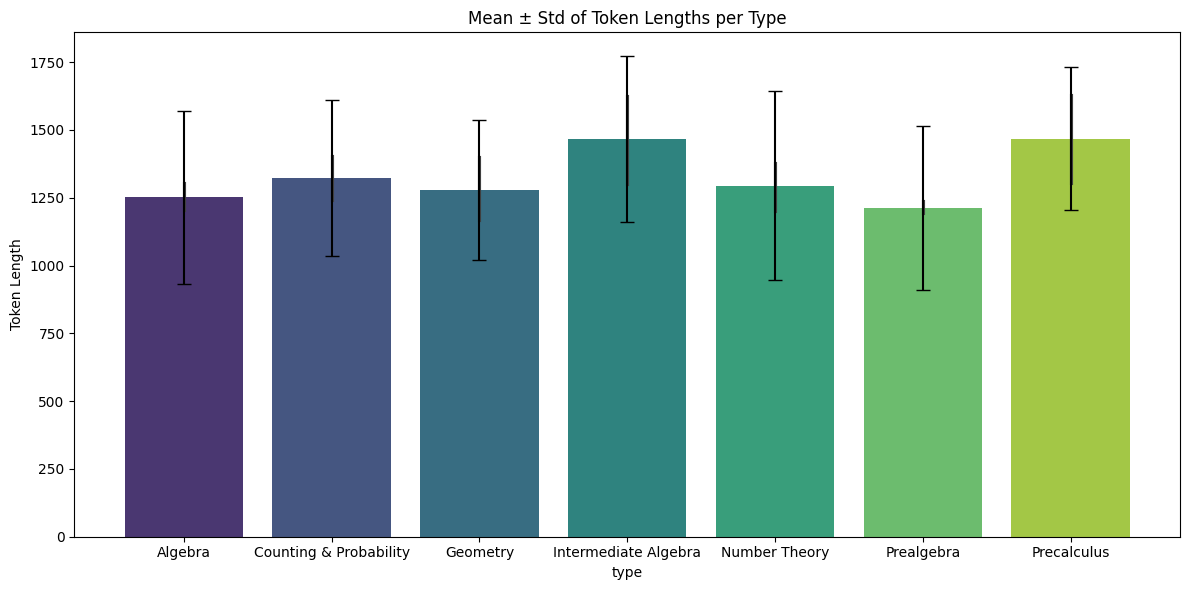

In [78]:
grouped_type_all = math_val.groupby('type')['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_correct, x='type', y='mean', hue='type', palette='viridis', legend=False)

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Type')
plt.ylabel('Token Length')
plt.tight_layout()
plt.show()

## Comparison: Average Token Length new vs old

In [111]:
df_new = math_val.copy()

In [113]:
df_old

,data_source,prompt,ability,reward_model,extra_info,responses,token_lengths,level,type,ground_truth,answer,reward,is_correct
0,MATH,[{'content': 'Let \[f(n) = \left\{ \begin{arra...,math,"{'ground_truth': '12', 'num_tokens': 2000, 'st...","{'index': 0, 'level': 4.0, 'split': 'test', 't...","Okay, so I have this function f(n) defined pie...",1217,4.0,Algebra,12,12,0.728827,True
1,MATH,[{'content': 'What is the value of $(26^2 - 24...,math,"{'ground_truth': '8000', 'num_tokens': 2000, '...","{'index': 1, 'level': 2.0, 'split': 'test', 't...","\nOkay, so I need to find the value of this e...",534,2.0,Algebra,8000,8000,0.913129,True
2,MATH,[{'content': 'A worker receives an annual wage...,math,"{'ground_truth': '10', 'num_tokens': 2000, 'st...","{'index': 2, 'level': 5.0, 'split': 'test', 't...","Okay, so I have this problem where a worker ge...",804,5.0,Algebra,10,10,0.863759,True
3,MATH,[{'content': 'What is the 2003rd term of the s...,math,"{'ground_truth': '4005', 'num_tokens': 2000, '...","{'index': 3, 'level': 2.0, 'split': 'test', 't...","Okay, so I need to find the 2003rd term of the...",472,2.0,Algebra,4005,4005,0.921658,True
4,MATH,[{'content': 'Simplify the following:$$\frac{3...,math,"{'ground_truth': '\frac{\sqrt{3}}{3}', 'num_to...","{'index': 4, 'level': 3.0, 'split': 'test', 't...","Okay, so I need to simplify the expression 3 o...",910,3.0,Algebra,\frac{\sqrt{3}}{3},\frac{\sqrt{3}}{3},0.837433,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,MATH,[{'content': 'Find the remainder when $(5x + 9...,math,"{'ground_truth': '12', 'num_tokens': 2000, 'st...","{'index': 495, 'level': 3.0, 'split': 'test', ...","Okay, so I need to find the remainder when thi...",623,3.0,Intermediate Algebra,12,12,0.899239,True
496,MATH,[{'content': 'Find the number of ordered pairs...,math,"{'ground_truth': '81', 'num_tokens': 2000, 'st...","{'index': 496, 'level': 5.0, 'split': 'test', ...","Okay, so I need to find the number of ordered ...",1293,5.0,Intermediate Algebra,81,81,0.692209,True
497,MATH,[{'content': 'Let $T$ be the set of all triple...,math,"{'ground_truth': '\frac{17}{21}', 'num_tokens'...","{'index': 497, 'level': 5.0, 'split': 'test', ...","Okay, so I have this problem here: I need to f...",2001,5.0,Intermediate Algebra,\frac{17}{21},None,-1.000000,False
498,MATH,[{'content': 'The graphs of $x^2 + y^2 + 6x - ...,math,"{'ground_truth': '40', 'num_tokens': 2000, 'st...","{'index': 498, 'level': 4.0, 'split': 'test', ...","Okay, so I have this problem here with two equ...",1719,4.0,Intermediate Algebra,40,\dfrac{\sqrt{17714}}{4},-1.000000,False


In [112]:
df_new

,data_source,prompt,ability,reward_model,extra_info,responses,token_lengths,level,type,ground_truth,answer,reward,is_correct
0,MATH,[{'content': 'Let \[f(n) = \left\{ \begin{arra...,math,"{'ground_truth': '12', 'num_tokens': 2000, 'st...","{'index': 0, 'level': 4.0, 'split': 'test', 't...","\]\nOkay, so I have this function f(n) defined...",704,4.0,Algebra,12,12,0.884675,True
1,MATH,[{'content': 'What is the value of $(26^2 - 24...,math,"{'ground_truth': '8000', 'num_tokens': 2000, '...","{'index': 1, 'level': 2.0, 'split': 'test', 't...",) To find the value of \((26^2 - 24^2 - 10)^2 ...,372,2.0,Algebra,8000,8000,0.933685,True
2,MATH,[{'content': 'A worker receives an annual wage...,math,"{'ground_truth': '10', 'num_tokens': 2000, 'st...","{'index': 2, 'level': 5.0, 'split': 'test', 't...",", \nOkay, so I have this problem where a worke...",769,5.0,Algebra,10,10,0.871479,True
3,MATH,[{'content': 'What is the 2003rd term of the s...,math,"{'ground_truth': '4005', 'num_tokens': 2000, '...","{'index': 3, 'level': 2.0, 'split': 'test', 't...",0\n\nTo find the 2003rd term of the sequence o...,268,2.0,Algebra,4005,4005,0.944238,True
4,MATH,[{'content': 'Simplify the following:$$\frac{3...,math,"{'ground_truth': '\frac{\sqrt{3}}{3}', 'num_to...","{'index': 4, 'level': 3.0, 'split': 'test', 't...",the expression is 3 divided by the square roo...,417,3.0,Algebra,\frac{\sqrt{3}}{3},\frac{\sqrt{3}}{3},0.928520,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,MATH,[{'content': 'Find the remainder when $(5x + 9...,math,"{'ground_truth': '12', 'num_tokens': 2000, 'st...","{'index': 495, 'level': 3.0, 'split': 'test', ...",) To find the remainder when the given polynom...,694,3.0,Intermediate Algebra,12,12,0.886581,True
496,MATH,[{'content': 'Find the number of ordered pairs...,math,"{'ground_truth': '81', 'num_tokens': 2000, 'st...","{'index': 496, 'level': 5.0, 'split': 'test', ...","...\nOkay, so I need to find the number of ord...",987,5.0,Intermediate Algebra,81,81,0.815173,True
497,MATH,[{'content': 'Let $T$ be the set of all triple...,math,"{'ground_truth': '\frac{17}{21}', 'num_tokens'...","{'index': 497, 'level': 5.0, 'split': 'test', ...","...\nOkay, so I have this problem here: I need...",2001,5.0,Intermediate Algebra,\frac{17}{21},None,-1.000000,False
498,MATH,[{'content': 'The graphs of $x^2 + y^2 + 6x - ...,math,"{'ground_truth': '40', 'num_tokens': 2000, 'st...","{'index': 498, 'level': 4.0, 'split': 'test', ...","\nOkay, so I have this problem with two equati...",1855,4.0,Intermediate Algebra,40,40,0.214682,True


In [127]:
df_combined = pd.DataFrame({
    'level': df_new['level'],
    'type': df_new['type'],
    'token_lengths_new': df_new['token_lengths'],
    'token_lengths_old': df_old['token_lengths'],
    'ground_truth': df_new['ground_truth'],
    'answer_new': df_new['answer'],
    'answer_old': df_old['answer'],
    'is_correct_new': df_new['is_correct'],
    'is_correct_old': df_old['is_correct'],
    'reward_new': df_new['reward'],
    'reward_old': df_old['reward']
})

df_combined

,level,type,token_lengths_new,token_lengths_old,ground_truth,answer_new,answer_old,is_correct_new,is_correct_old,reward_new,reward_old
0,4.0,Algebra,704,1217,12,12,12,True,True,0.884675,0.728827
1,2.0,Algebra,372,534,8000,8000,8000,True,True,0.933685,0.913129
2,5.0,Algebra,769,804,10,10,10,True,True,0.871479,0.863759
3,2.0,Algebra,268,472,4005,4005,4005,True,True,0.944238,0.921658
4,3.0,Algebra,417,910,\frac{\sqrt{3}}{3},\frac{\sqrt{3}}{3},\frac{\sqrt{3}}{3},True,True,0.928520,0.837433
...,...,...,...,...,...,...,...,...,...,...,...
495,3.0,Intermediate Algebra,694,623,12,12,12,True,True,0.886581,0.899239
496,5.0,Intermediate Algebra,987,1293,81,81,81,True,True,0.815173,0.692209
497,5.0,Intermediate Algebra,2001,2001,\frac{17}{21},None,None,False,False,-1.000000,-1.000000
498,4.0,Intermediate Algebra,1855,1719,40,40,\dfrac{\sqrt{17714}}{4},True,False,0.214682,-1.000000


In [128]:
# Case 1: New is incorrect, Old is correct
new_wrong_old_right = df_combined[(df_combined['is_correct_new'] == False) & 
                                  (df_combined['is_correct_old'] == True)]

# Case 2: New is correct, Old is incorrect
new_right_old_wrong = df_combined[(df_combined['is_correct_new'] == True) & 
                                  (df_combined['is_correct_old'] == False)]


In [129]:
new_wrong_old_right

,level,type,token_lengths_new,token_lengths_old,ground_truth,answer_new,answer_old,is_correct_new,is_correct_old,reward_new,reward_old
17,3.0,Algebra,974,667,3,2,3,False,True,-1.0,0.891572
22,3.0,Algebra,2001,996,\frac{14}{3},None,\dfrac{14}{3},False,True,-1.0,0.812379
60,3.0,Algebra,525,546,11,9,11,False,True,-1.0,0.911374
128,5.0,Precalculus,1427,1129,8 \pi,9\pi,8\pi,False,True,-1.0,0.765820
136,2.0,Precalculus,819,878,"(-\infty, 0]","(-\infty, 0)","(-\infty, 0]",False,True,-1.0,0.845876
139,5.0,Precalculus,975,1049,120^\circ,35^\circ,120,False,True,-1.0,0.795052
155,5.0,Precalculus,1867,1257,144,81,144,False,True,-1.0,0.710133
170,3.0,Precalculus,766,733,1 - 12i,-9 + 2i,1 - 12i,False,True,-1.0,0.878964
184,4.0,Prealgebra,691,809,\frac{4}{9},\frac{5}{9},\dfrac{4}{9},False,True,-1.0,0.862619
190,5.0,Prealgebra,864,1516,5.4 \text{ cents},12.2,5.4,False,True,-1.0,0.553657


In [130]:
new_right_old_wrong

,level,type,token_lengths_new,token_lengths_old,ground_truth,answer_new,answer_old,is_correct_new,is_correct_old,reward_new,reward_old
74,4.0,Algebra,1528,733,129,129,497,True,False,0.544640,-1.0
120,5.0,Algebra,724,1043,-\frac{35}{9},-\frac{35}{9},-\dfrac{323}{9},True,False,0.880766,-1.0
138,3.0,Precalculus,965,1179,\frac{1}{16},\dfrac{1}{16},-\dfrac{1}{16},True,False,0.821827,-1.0
144,3.0,Precalculus,1200,2001,\frac{1}{8},\frac{1}{8},None,True,False,0.736403,-1.0
148,4.0,Precalculus,1080,1808,12,12,5,True,False,0.784185,-1.0
160,5.0,Precalculus,972,1215,6 - 5i,6 - 5i,3 + \frac{3\sqrt{2}}{2} - \left(2 + \frac{3\sq...,True,False,0.819736,-1.0
239,5.0,Prealgebra,1171,1362,\frac{270}7\text{ degrees},\dfrac{270}{7},\dfrac{135}{7},True,False,0.748840,-1.0
261,5.0,Prealgebra,1298,1242,80,80,70,True,False,0.689633,-1.0
281,3.0,Geometry,886,870,216,216,24\sqrt{3},True,False,0.843808,-1.0
287,5.0,Geometry,1201,2001,8,8,None,True,False,0.735963,-1.0


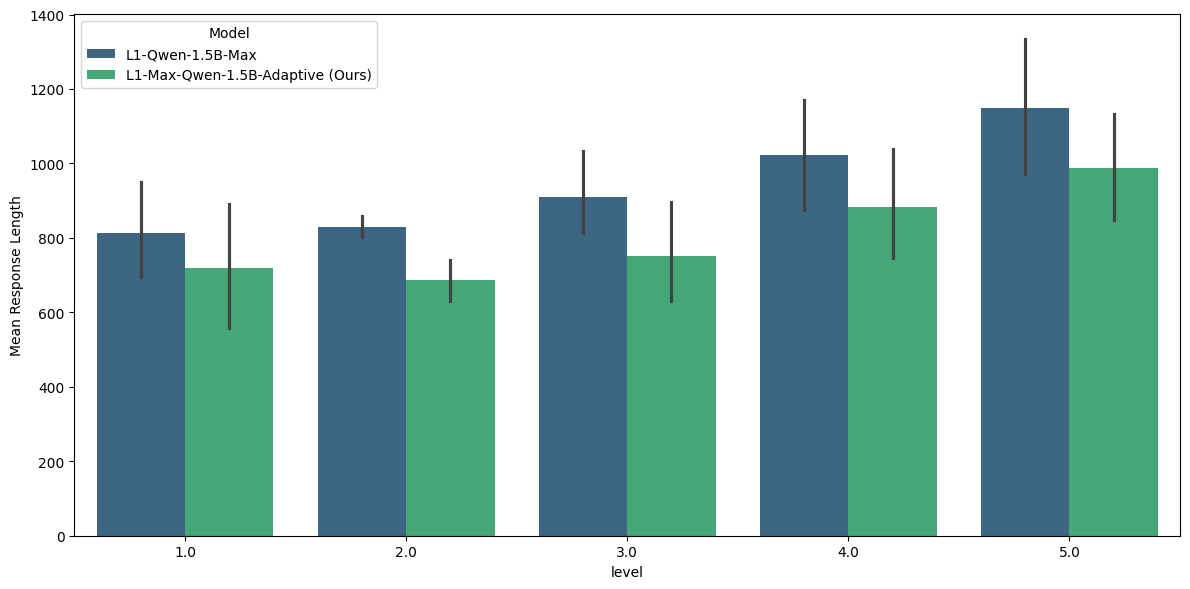

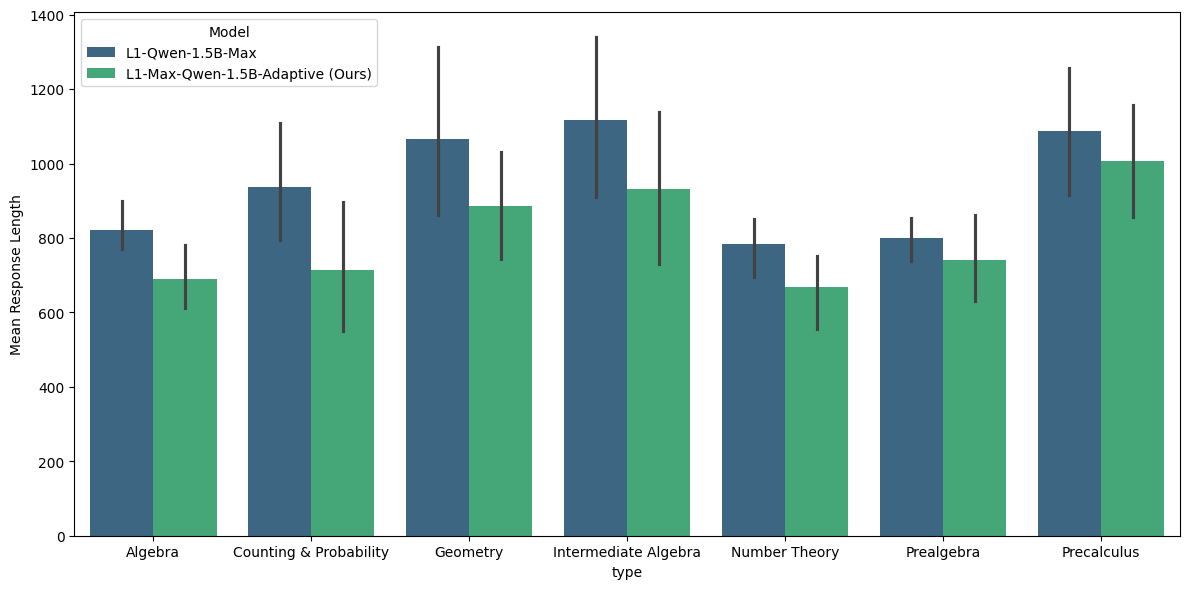

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute mean token lengths per level and type
df_grouped = df_combined.groupby(['level', 'type'])[['token_lengths_new', 'token_lengths_old']].mean().reset_index()
df_grouped = df_grouped.rename(columns={
    'token_lengths_old': 'L1-Qwen-1.5B-Max',
    'token_lengths_new': 'L1-Max-Qwen-1.5B-Adaptive (Ours)'
})

# Melt the DataFrame so we can plot both token lengths in one go
df_melted = df_grouped.melt(id_vars=['level', 'type'], 
                            value_vars=['L1-Qwen-1.5B-Max', 'L1-Max-Qwen-1.5B-Adaptive (Ours)'], 
                            var_name='Model', value_name='Mean Response Length')

# Plot mean token lengths grouped by level and type
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='level', y='Mean Response Length', hue='Model', 
            palette='viridis', dodge=True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='type', y='Mean Response Length', hue='Model', 
            palette='viridis', dodge=True)

plt.tight_layout()
plt.show()


## DRAFT (Finish incomplete eval runs)

In [98]:
import os
import csv
import pandas as pd
from tabulate import tabulate
from tqdm import tqdm

output_dir = "../eval_results"
n_samples = 1
model_path = "models/L1-Max-Qwen-1.5B-Adaptive"
data_path = "MATH_processed/no_level_type/test.parquet"
max_new_tokens = 2000
batch_size = 32


def evaluate_responses(responses, ground_truths, target_tokens, token_lengths):
    total_scores = []
    total_rewards = []
    passes = 0
    for resp_list, gt, target, used in tqdm(zip(responses, ground_truths, target_tokens, token_lengths), total=len(responses), desc="Evaluating"):
        rewards_list = [math_reward_fn(r, gt, target, u) for r, u in zip(list(resp_list), list(token_lengths))]
        total_rewards.append(rewards_list)
        score_list = [0 if reward == -1 else 1 for reward in rewards_list]
        total_scores.append(score_list)
        if np.max(score_list) == 1:
            passes += 1
    pass_at_1 = np.mean([s[0] for s in total_scores])
    pass_at_n = passes / len(responses)
    return pass_at_1, pass_at_n, total_scores, total_rewards


df = pd.read_parquet("../eval_results/Responses_L1-Max-Qwen-1.5B-Adaptive_test_no_level_type.parquet")

ground_truths = [rm["ground_truth"] for rm in df["reward_model"]]
target_tokens = [rm["num_tokens"] for rm in df["reward_model"]]
responses = df["responses"]
token_lengths = df["token_lengths"]

# Evaluate
pass_at_1, pass_at_n, total_scores, total_rewards = evaluate_responses(responses, ground_truths, target_tokens, token_lengths)
print(f"pass@1: {pass_at_1:.4f}, pass@{n_samples}: {pass_at_n:.4f}")

# Save metrics
csv_path = os.path.join(output_dir, "pass.csv")
row_data = {
    "model_path": model_path,
    "dataset": os.path.basename(data_path),
    "pass@1": pass_at_1,
    f"pass@{n_samples}": pass_at_n
}
file_exists = os.path.isfile(csv_path)
with open(csv_path, mode='a', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=row_data.keys())
    if not file_exists:
        writer.writeheader()
    writer.writerow(row_data)

# Save total_scores
total_scores_df = pd.DataFrame(total_scores)
total_rewards_df = pd.DataFrame(total_rewards)

# Extract model name and split name from paths
model_name = os.path.basename(model_path.rstrip("/"))
split_name = os.path.splitext(os.path.basename(data_path))[0]

total_scores_filename = f"TotalScores_{model_name}_{split_name}.parquet"
total_scores_df.to_parquet(os.path.join(output_dir, total_scores_filename))

total_rewards_filename = f"TotalRewards_{model_name}_{split_name}.parquet"
total_rewards_df.to_parquet(os.path.join(output_dir, total_rewards_filename))

# Print summary
table_data = [[k, v] for k, v in row_data.items()]
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

Evaluating:   0%|          | 0/500 [00:00<?, ?it/s]

Evaluating: 100%|██████████| 500/500 [00:00<00:00, 2182.96it/s]

pass@1: 0.7820, pass@1: 0.7820
+------------+----------------------------------+
| Metric     | Value                            |
+============+==================================+
| model_path | models/L1-Max-Qwen-1.5B-Adaptive |
+------------+----------------------------------+
| dataset    | test.parquet                     |
+------------+----------------------------------+
| pass@1     | 0.782                            |
+------------+----------------------------------+
